In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

/home/nomi/miniconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
img_size = 256
IMG_PATH = 'train_/'

X_train = []
Y_train = []

def read_image(image_name):
    image = cv2.imread(IMG_PATH + image_name)
    image = cv2.resize(image, (img_size, img_size))
    return image

def showImage(image_name):
    image = read_image(image_name)
    print("Image Shape: "+str(image.shape))
    plt.imshow(image)
    return

# Load Dataset
def load_dataset():
    data = pd.read_csv('csv/train.csv', sep=',')
    row = data.iloc[0]
    showImage(row['image_name'])
    #for idx, row in data.iterrows():
    #    X_train.append(read_image(row['image_name']))
    return

Image Shape: (256, 256, 3)


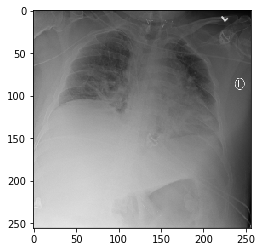

In [39]:
load_dataset()

In [71]:
# build model
def build_model():
    model = VGG16(weights=None, include_top=False, input_shape=(img_size, img_size, 3))
    #model.load_weights()
    #model.summary()
    model.layers.pop()
    model.layers.pop()
    model.layers.pop()
    #model.summary()
    model.outputs = [model.layers[-1].output]
    
    model.layers[-2].outbound_nodes = []
    
    l1 = Conv2D(256, kernel_size=(2, 2), strides=2)(model.output)
    l1 = BatchNormalization()(l1)
    l1 = Activation('relu')(l1)
    
    l1 = Conv2D(128, kernel_size=(2, 2), strides=1)(model.output)
    l1 = BatchNormalization()(l1)
    l1 = Activation('relu')(l1)
    
    l1 = Flatten()(l1)
    l1 = Dense(12, activation='softmax')(l1)
    
    model = Model(model.input, l1)

    for layer in model.layers[:15]:
        layer.trainable = False
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________